In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import cv2
import json
from tqdm import tqdm
!pip install allensdk
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [2]:

from google.colab import drive
drive.mount('/content/drive', force_remount = True)
#output_dir = '/local1/ecephys_cache_dir/'
output_dir = '/content/drive/MyDrive/EC523/Course Project/'
# this path determines where downloaded data will be stored
# this path determines where downloaded data will be stored
manifest_path = os.path.join(output_dir, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)


video_data = cache.get_natural_movie_template(3)

Mounted at /content/drive


## convert the h5 data into the mp4 data

In [ ]:

# Input and output file paths
h5_file = output_dir + 'natural_movie_templates/natural_movie_3.h5'  # Path to the input h5 file
output_mp4 = output_dir + 'natural_movie_templates/natural_movie_3.mp4'  # Path to the output mp4 file


# Assume video data is stored in the 'frames' dataset with shape (frames, height, width)
frames = video_data  # Extract all frames
fps = 30

# Get the number of frames, height, and width of the video
num_frames, frame_height, frame_width = frames.shape

# Use XVID or FFMPEG for better quality
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Alternative: 'MJPG', 'FFV1' (lossless)
out = cv2.VideoWriter(output_mp4, fourcc, fps, (frame_width, frame_height), isColor=False)


# Write each frame to the video
for i in range(num_frames):
    # Write frames as-is without color conversion
    frame_uint8 = np.uint8(frames[i])
    out.write(frame_uint8)  # Ensure isColor=False in VideoWriter

# Release resources
out.release()
print(f"Video successfully saved as {output_mp4}")


Video successfully saved as /content/drive/MyDrive/EC523/Course Project/natural_movie_templates/natural_movie_3.mp4


# load session infos; stack the neuropixel spike trains across different sessions (only use first 25 sessions)

In [15]:
sessions_info = cache.get_session_table()
session_id_all = sessions_info.index.values



In [24]:
design_all = []
for i in tqdm(range(25)):
  session_id = session_id_all[i]
  print(session_id)
  session = cache.get_session_data(session_id)

  # Extract the spike times

  video_presentations = session.get_stimulus_table("natural_movie_three")
  visp_units = session.units[session.units["ecephys_structure_acronym"] == "VISp"]
  print(len(visp_units))
  spikes = session.presentationwise_spike_times(
      stimulus_presentation_ids=video_presentations.index.values,
      unit_ids=visp_units.index.values[:]
      )

  # make the design matrix

  spikes["count"] = np.zeros(spikes.shape[0])
  spikes = spikes.groupby(["stimulus_presentation_id", "unit_id"]).count()

  design = pd.pivot_table(
      spikes,
      values="count",
      index="stimulus_presentation_id",
      columns="unit_id",
      fill_value=0.0,
      aggfunc=np.sum
      )


  # fill the zero value

  design_new = pd.DataFrame(0, index=video_presentations.index, columns=design.columns)
  design_new.loc[design.index] = design

  #add the current design matrix (36000 x num_neurons) into the list
  design_all.append(design_new)

design_all = np.hstack(design_all)


  0%|          | 0/25 [00:00<?, ?it/s]

715093703
60


  4%|▍         | 1/25 [01:11<28:25, 71.04s/it]

719161530
52


  8%|▊         | 2/25 [02:26<28:19, 73.91s/it]

721123822
41


 12%|█▏        | 3/25 [04:02<30:46, 83.94s/it]

732592105
110


 16%|█▌        | 4/25 [05:59<33:54, 96.88s/it]

737581020
40


 20%|██        | 5/25 [08:09<36:12, 108.64s/it]

739448407
19


 24%|██▍       | 6/25 [10:08<35:32, 112.25s/it]

742951821
33


 28%|██▊       | 7/25 [12:10<34:36, 115.37s/it]

743475441
45


 32%|███▏      | 8/25 [13:49<31:13, 110.19s/it]

744228101
35


 36%|███▌      | 9/25 [16:29<33:35, 125.98s/it]

746083955
14


 40%|████      | 10/25 [18:21<30:22, 121.52s/it]

750332458
63


 44%|████▍     | 11/25 [20:35<29:17, 125.51s/it]

750749662


/usr/local/lib/python3.10/dist-packages/allensdk/brain_observatory/ecephys/probes.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  units_table.drop(columns=["quality"], inplace=True)


52


 48%|████▊     | 12/25 [22:34<26:45, 123.47s/it]

751348571
49


 52%|█████▏    | 13/25 [24:45<25:09, 125.79s/it]

754312389
102


 56%|█████▌    | 14/25 [26:55<23:15, 126.89s/it]

754829445
92


 60%|██████    | 15/25 [28:49<20:30, 123.07s/it]

755434585
75


 64%|██████▍   | 16/25 [30:28<17:22, 115.85s/it]

756029989
51


 68%|██████▊   | 17/25 [32:23<15:24, 115.53s/it]

757216464
85


 72%|███████▏  | 18/25 [34:34<14:01, 120.28s/it]

757970808
80


 76%|███████▌  | 19/25 [36:13<11:23, 113.95s/it]

758798717
47


 80%|████████  | 20/25 [38:06<09:27, 113.57s/it]

759883607
58


 84%|████████▍ | 21/25 [39:27<06:54, 103.69s/it]

760345702
72


 88%|████████▊ | 22/25 [40:58<04:59, 99.81s/it] 

760693773
88


 92%|█████████▏| 23/25 [43:05<03:36, 108.16s/it]

761418226
36


 96%|█████████▌| 24/25 [44:49<01:46, 106.84s/it]

762120172
84


100%|██████████| 25/25 [46:49<00:00, 112.40s/it]


# split the data into train / validation / tests  (8:1:1)

In [32]:
np.random.seed(2024)
idx = np.random.permutation(np.arange(10))
train_idx = np.array([np.arange(i*3600, (i+1)*3600) for i in idx[:8]]).flatten()
val_idx = [np.arange(i*3600, (i+1)*3600) for i in idx[8:9]]
test_idx = [np.arange(i*3600, (i+1)*3600) for i in idx[9:]]

np_all = dict()
np_all['train'] = design_all[train_idx,:]
np_all['val'] = design_all[val_idx, :]
np_all['test'] = design_all[test_idx, :]

with h5py.File(output_dir+'np_all.h5', 'w') as h5f:
    for key, value in np_all.items():
        h5f.create_dataset(key, data=value)


In [3]:
with h5py.File(output_dir+'np_all.h5', 'r') as f:
  print(list(f.keys()))

  train_data = f['train'][:]
  val_data = f['val'][:]
  test_data = f['test'][:]



['test', 'train', 'val']


In [34]:
design_all.shape

(36000, 1483)

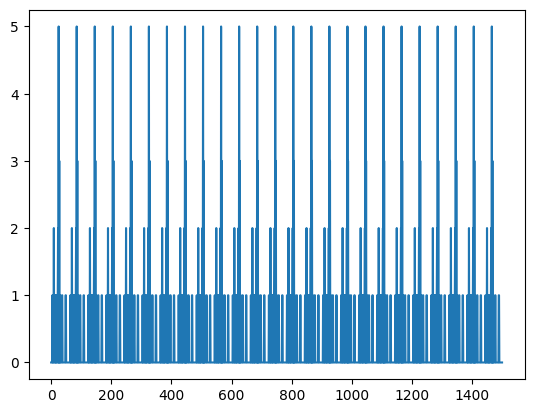

In [33]:
plt.plot(train_data[2,:])

(array([3240., 3240., 3240., 3240., 3240., 3240., 3240., 2520.,  360.,
        3240.]),
 array([ 3600. ,  6839.9, 10079.8, 13319.7, 16559.6, 19799.5, 23039.4,
        26279.3, 29519.2, 32759.1, 35999. ]),
 <BarContainer object of 10 artists>)

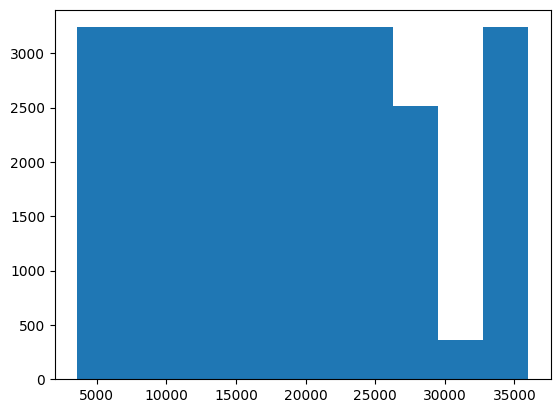

In [36]:
plt.hist(train_idx)

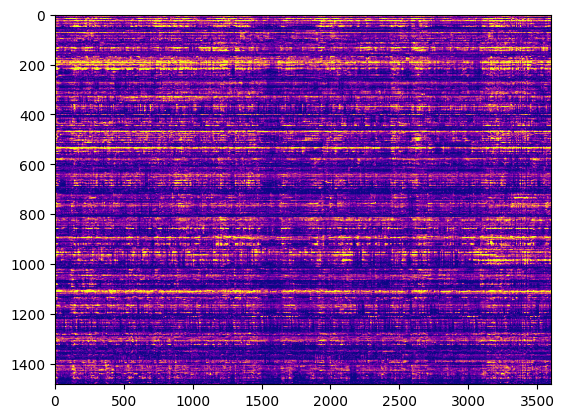

In [63]:
plt.imshow(design_all[0:3600,:].T, vmin=0, vmax=1, cmap='plasma', aspect='auto')

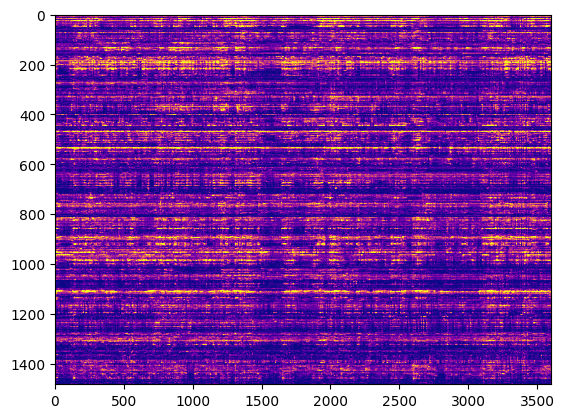

In [62]:
plt.imshow(design_all[3600:7200,:].T, vmin=0, vmax=1, cmap='plasma', aspect='auto')

In [47]:
np.max(design_all[3600:7200,:] - design_all[:3600,:])

13